# sharing bike data set でのcovariate shift実験

## data loding

In [140]:
import autopep8
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.spatial import distance
%matplotlib inline

In [141]:
hour = pd.read_csv('../Bike-Sharing-Dataset/hour.csv')
day = pd.read_csv('../Bike-Sharing-Dataset/day.csv')

In [142]:
[hour.shape, day.shape]

[(17379, 17), (731, 16)]

#  データセットを4つに分類
季節ごとにデータセットを分類

In [143]:
from sklearn.preprocessing import scale
import datetime

In [144]:
# datetime型に変換、正規化実行
hour[['temp', 'atemp', 'hum', 'windspeed']] = scale(hour[['temp', 'atemp', 'hum', 'windspeed']])

# お天気変数をダミー変数化 & 正規化
hour = pd.concat([hour, pd.get_dummies(hour_2['weathersit'], prefix='weather',drop_first = True)], axis= 1)
hour['dteday'] = hour['dteday'].apply(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d'))

In [145]:
# 季節ごとにデータセットを分割
spring_11 = hour.loc[(hour['dteday'] < datetime.date(2011, 6, 1))]

fall_11 = hour[(hour['dteday'] > datetime.date(2011, 6, 30)) & (hour['dteday'] < datetime.date(2011, 10, 1))]

spring_12 = hour[(hour['dteday'] < datetime.date(2012, 4, 1)) & (hour['dteday'] > datetime.date(2011, 12, 31))]

fall_12 = hour[(hour['dteday'] > datetime.date(2012, 6, 30))&(hour['dteday'] < datetime.date(2012, 10, 1))]

/home/lab/nakakei/.pyenv/versions/3.6.4/envs/env_linux/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  
/home/lab/nakakei/.pyenv/versions/3.6.4/envs/env_linux/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  after removing the cwd from sys.path.
/home/lab/nakakei/.pyenv/versions/3.6.4/envs/env_linux/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Comparing Series of datetimes with 'da

## 共変量の分布

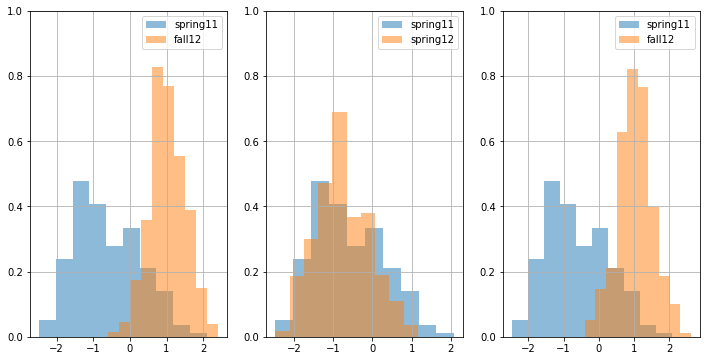

In [161]:
plt.figure(figsize = (12,6))
plt.subplot(1,3,1)
spring_11['temp'].hist(alpha = 0.5, label = 'spring11', density=True)
fall_11['temp'].hist(alpha = 0.5, label = 'fall12', density = True)
plt.ylim(0,1)
plt.legend()

plt.subplot(1,3,2)
spring_11['temp'].hist(alpha = 0.5, label = 'spring11', density = True)
spring_12['temp'].hist(alpha = 0.5, label = 'spring12', density = True)
plt.ylim(0,1)
plt.legend()

plt.subplot(1,3,3)
spring_11['temp'].hist(alpha = 0.5, label = 'spring11', density = True)
fall_12['temp'].hist(alpha = 0.5, label = 'fall12', density = True)
plt.ylim(0,1)
plt.legend()
plt.savefig('covariate_temp.pdf')

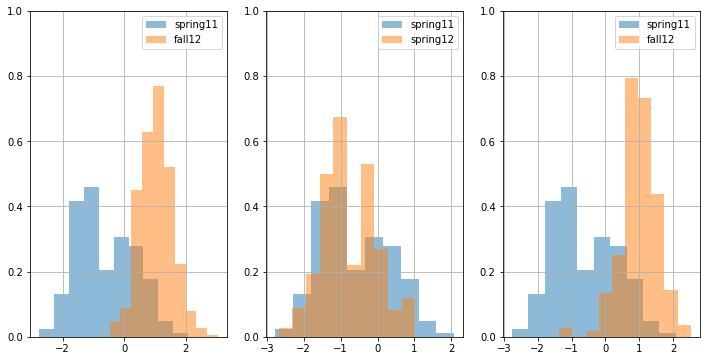

In [162]:
plt.figure(figsize = (12,6))
plt.subplot(1,3,1)
spring_11['atemp'].hist(alpha = 0.5, label = 'spring11', density = True)
fall_11['atemp'].hist(alpha = 0.5, label = 'fall12', density = True)
plt.ylim(0,1)
plt.legend()

plt.subplot(1,3,2)
spring_11['atemp'].hist(alpha = 0.5, label = 'spring11', density = True)
spring_12['atemp'].hist(alpha = 0.5, label = 'spring12', density = True)
plt.ylim(0,1)
plt.legend()

plt.subplot(1,3,3)
spring_11['atemp'].hist(alpha = 0.5, label = 'spring11', density = True)
fall_12['atemp'].hist(alpha = 0.5, label = 'fall12', density = True)
plt.ylim(0,1)
plt.legend()
plt.savefig('covariate_atemp.pdf')

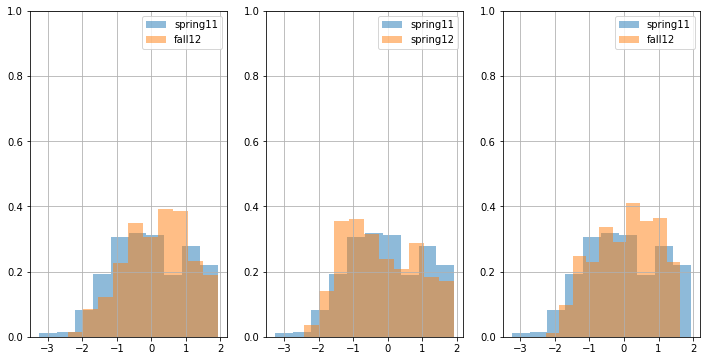

In [163]:
plt.figure(figsize = (12,6))
plt.subplot(1,3,1)
spring_11['hum'].hist(alpha = 0.5, label = 'spring11', density = True)
fall_11['hum'].hist(alpha = 0.5, label = 'fall12', density = True)
plt.ylim(0,1)
plt.legend()

plt.subplot(1,3,2)
spring_11['hum'].hist(alpha = 0.5, label = 'spring11', density = True)
spring_12['hum'].hist(alpha = 0.5, label = 'spring12', density = True)
plt.ylim(0,1)
plt.legend()

plt.subplot(1,3,3)
spring_11['hum'].hist(alpha = 0.5, label = 'spring11', density = True)
fall_12['hum'].hist(alpha = 0.5, label = 'fall12', density = True)
plt.ylim(0,1)
plt.legend()
plt.savefig('covariate_hum.pdf')

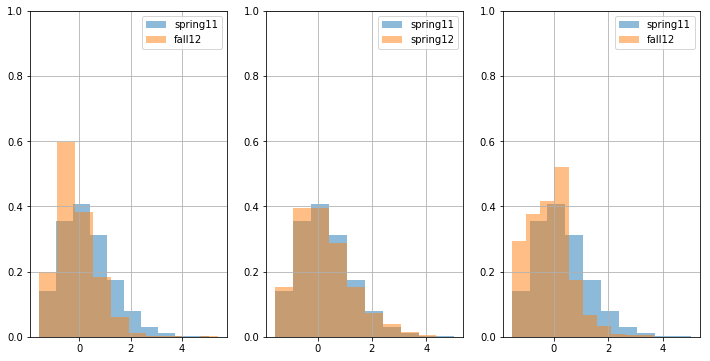

In [164]:
plt.figure(figsize = (12,6))
plt.subplot(1,3,1)
spring_11['windspeed'].hist(alpha = 0.5, label = 'spring11', density = True)
fall_11['windspeed'].hist(alpha = 0.5, label = 'fall12', density = True)
plt.ylim(0,1)
plt.legend()

plt.subplot(1,3,2)
spring_11['windspeed'].hist(alpha = 0.5, label = 'spring11', density = True)
spring_12['windspeed'].hist(alpha = 0.5, label = 'spring12', density =True)
plt.ylim(0,1)
plt.legend()

plt.subplot(1,3,3)
spring_11['windspeed'].hist(alpha = 0.5, label = 'spring11', density= True)
fall_12['windspeed'].hist(alpha = 0.5, label = 'fall12', density = True)
plt.ylim(0,1)
plt.legend()
plt.savefig('covariate_windspeed.pdf')

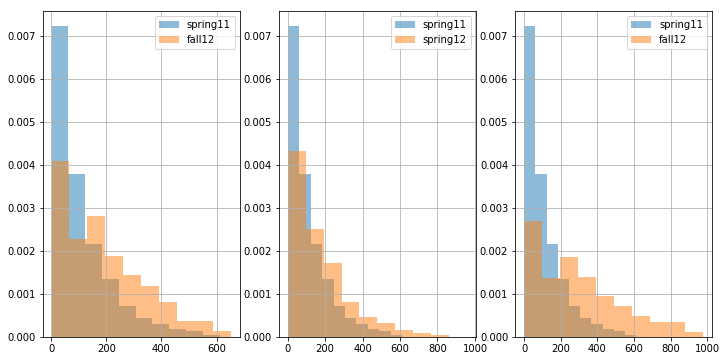

In [165]:
plt.figure(figsize = (12,6))
plt.subplot(1,3,1)
spring_11['cnt'].hist(alpha = 0.5, label = 'spring11', density = True)
fall_11['cnt'].hist(alpha = 0.5, label = 'fall12', density = True)
plt.legend()

plt.subplot(1,3,2)
spring_11['cnt'].hist(alpha = 0.5, label = 'spring11', density = True)
spring_12['cnt'].hist(alpha = 0.5, label = 'spring12', density = True)
plt.legend()

plt.subplot(1,3,3)
spring_11['cnt'].hist(alpha = 0.5, label = 'spring11', density = True)
fall_12['cnt'].hist(alpha = 0.5, label = 'fall12', density = True)
plt.legend()
plt.savefig('dist_cnt.pdf')

# 学習 by XGboost

In [166]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

## 重みなしの学習(num_round =20)

In [167]:
num_core = 2
dtrain = xgb.DMatrix(
    spring_11[['temp', 'atemp', 'hum', 'windspeed']], spring_11['cnt'])
dtest1 = xgb.DMatrix(fall_11[['temp', 'atemp', 'hum', 'windspeed']], fall_11['cnt'])
dtest2 = xgb.DMatrix(spring_12[['temp', 'atemp', 'hum', 'windspeed']], spring_12['cnt'])
dtest3 = xgb.DMatrix(fall_12[['temp', 'atemp', 'hum', 'windspeed']], fall_12['cnt'])

watchlist = [(dtrain, 'train')]
param = {'max_depth': 6, 'eta': 0.2, 'lambda':1,
         'silent': 0, 'nthread': num_core,
         'objective': 'reg:linear', 'booster': 'gbtree'}
num_round = 20
non_weight = xgb.train(param, dtrain, num_round)

In [156]:
print('train error:', np.sqrt((non_weight.predict(dtrain) - dtrain.get_label())**2).mean())
print('test_1 error:', np.sqrt((non_weight.predict(dtest1) - dtest1.get_label())**2).mean())
print('test_2 error:', np.sqrt((non_weight.predict(dtest2) - dtest2.get_label())**2).mean())
print('test_3 error:', np.sqrt((non_weight.predict(dtest3) - dtest3.get_label())**2).mean())

train error: 51.610783
test_1 error: 119.87656
test_2 error: 106.72612
test_3 error: 165.53015


## 重みなしの学習(num_round =100)

In [157]:
num_core = 2
dtrain = xgb.DMatrix(
    spring_11[['temp', 'atemp', 'hum', 'windspeed']], spring_11['cnt'])
dtest1 = xgb.DMatrix(fall_11[['temp', 'atemp', 'hum', 'windspeed']], fall_11['cnt'])
dtest2 = xgb.DMatrix(spring_12[['temp', 'atemp', 'hum', 'windspeed']], spring_12['cnt'])
dtest3 = xgb.DMatrix(fall_12[['temp', 'atemp', 'hum', 'windspeed']], fall_12['cnt'])

watchlist = [(dtrain, 'train')]
param = {'max_depth': 6, 'eta': 0.2, 'lambda':1,
         'silent': 0, 'nthread': num_core,
         'objective': 'reg:linear', 'booster': 'gbtree'}
num_round = 100
non_weight = xgb.train(param, dtrain, num_round)

In [158]:
print('train error:', np.sqrt((non_weight.predict(dtrain) - dtrain.get_label())**2).mean())
print('test_1 error:', np.sqrt((non_weight.predict(dtest1) - dtest1.get_label())**2).mean())
print('test_2 error:', np.sqrt((non_weight.predict(dtest2) - dtest2.get_label())**2).mean())
print('test_3 error:', np.sqrt((non_weight.predict(dtest3) - dtest3.get_label())**2).mean())

train error: 41.659313
test_1 error: 126.99444
test_2 error: 107.917366
test_3 error: 170.41292


## 重みなしの学習(num_round =300)

In [324]:
num_core = 2
dtrain = xgb.DMatrix(
    spring_11[['temp', 'atemp', 'hum', 'windspeed']], spring_11['cnt'])
dtest1 = xgb.DMatrix(fall_11[['temp', 'atemp', 'hum', 'windspeed']], fall_11['cnt'])
dtest2 = xgb.DMatrix(spring_12[['temp', 'atemp', 'hum', 'windspeed']], spring_12['cnt'])
dtest3 = xgb.DMatrix(fall_12[['temp', 'atemp', 'hum', 'windspeed']], fall_12['cnt'])

watchlist = [(dtrain, 'train')]
param = {'max_depth': 6, 'eta': 0.2, 'lambda':1,
         'silent': 0, 'nthread': num_core,
         'objective': 'reg:linear', 'booster': 'gbtree'}
num_round = 300
non_weight = xgb.train(param, dtrain, num_round)

In [325]:
print('train error:', np.sqrt((non_weight.predict(dtrain) - dtrain.get_label())**2).mean())
print('test_1 error:', np.sqrt((non_weight.predict(dtest1) - dtest1.get_label())**2).mean())
print('test_2 error:', np.sqrt((non_weight.predict(dtest2) - dtest2.get_label())**2).mean())
print('test_3 error:', np.sqrt((non_weight.predict(dtest3) - dtest3.get_label())**2).mean())

train error: 30.661442
test_1 error: 132.55879
test_2 error: 111.60272
test_3 error: 176.33792


## Ru_LSIFによる重み付け(num_round = 300)

### $\alpha$をチューニングしないと精度はかえって落ちる結果に
- 原論文でも言われているように、$\alpha = 0$だと精度が落ちてしまう

In [159]:
from pyRULSIF import *
from pylab import *

In [316]:
data_list = []
data_list_weight = []
for hoge in [fall_11, spring_12, fall_12]:
    x_de = np.array(spring_11[['temp', 'atemp', 'hum', 'windspeed']]).T
    x_nu = np.array(hoge[['temp', 'atemp', 'hum', 'windspeed']]).T
    x_re = np.tile(np.linspace(-6,6, 1000)[:,np.newaxis], 4).T

    alpha_list = [0, 0.2, 0.4, 0.5, 0.6, 0.7]
    models_lsif = []
    weight_list = []
    for i in alpha_list:
        alpha = i
        PE, w, s = R_ULSIF(x_nu, x_de, c_[x_re, x_nu, x_de], alpha,
                           sigma_list(x_nu, x_de), lambda_list(), x_nu.shape[1], 5)

        dtrain = xgb.DMatrix(
            spring_11[['temp', 'atemp', 'hum', 'windspeed']], spring_11['cnt'], weight=w[-x_de.shape[1]:])
        
        ru_lsif = xgb.train(param, dtrain, num_round)
        models_lsif.append(ru_lsif)
        weight_list.append(w)
    data_list.append(models_lsif)
    data_list_weight.append(weight)

### trainの結果

In [347]:
train = xgb.DMatrix(spring_11[['temp', 'atemp', 'hum', 'windspeed']], spring_11['cnt'])
print([np.sqrt((data_list[0][x].predict(train) - train.get_label())**2).mean() for x in range(len(alpha_list))])
print([np.sqrt((data_list[1][x].predict(train) - train.get_label())**2).mean() for x in range(len(alpha_list))])
print([np.sqrt((data_list[2][x].predict(train) - train.get_label())**2).mean() for x in range(len(alpha_list))])

[49.879467, 48.85316, 47.9121, 48.667072, 47.38147]
[35.81224, 35.24069, 34.908092, 34.720814, 33.927505]
[43.167137, 40.661045, 39.496185, 38.512966, 37.555496]


### test(fall_11) result

In [346]:
test = xgb.DMatrix(fall_11[['temp', 'atemp', 'hum', 'windspeed']], fall_11['cnt'])
print([np.sqrt((data_list[0][x].predict(test) - test.get_label())**2).mean() for x in range(len(alpha_list))])


[134.04553, 132.40523, 131.88261, 132.78401, 133.69115]


### test(spring_12) result

In [345]:
test = xgb.DMatrix(spring_12[['temp', 'atemp', 'hum', 'windspeed']], spring_12['cnt'])
print([np.sqrt((data_list[1][x].predict(test) - test.get_label())**2).mean() for x in range(len(alpha_list))])

[112.06149, 111.814224, 111.209015, 111.39806, 111.5267]


### test(fall_12) result

In [344]:
test = xgb.DMatrix(fall_12[['temp', 'atemp', 'hum', 'windspeed']], fall_12['cnt'])
print([np.sqrt((data_list[2][x].predict(test) - test.get_label())**2).mean() for x in range(len(alpha_list))])

[179.37566, 177.65587, 177.15778, 177.31723, 176.083]


## Ru_LSIFによる重み付け(num_round = 20)

In [168]:
lsif_20 = []
lsif_20_weight = []
num_core = 6
param = {'max_depth': 6, 'eta': 0.2, 'lambda':1,
         'silent': 0, 'nthread': num_core,
         'objective': 'reg:linear', 'booster': 'gbtree'}
num_round = 20
for hoge in [fall_11, spring_12, fall_12]:
    x_de = np.array(spring_11[['temp', 'atemp', 'hum', 'windspeed']]).T
    x_nu = np.array(hoge[['temp', 'atemp', 'hum', 'windspeed']]).T
    x_re = np.tile(np.linspace(-6,6, 1000)[:,np.newaxis], 4).T

    alpha_list = [0, 0.2, 0.4, 0.5, 0.6, 0.7]
    models_lsif = []
    weight_list = []
    for i in alpha_list:
        alpha = i
        PE, w, s = R_ULSIF(x_nu, x_de, c_[x_re, x_nu, x_de], alpha,
                           sigma_list(x_nu, x_de), lambda_list(), x_nu.shape[1], 5)

        dtrain = xgb.DMatrix(
            spring_11[['temp', 'atemp', 'hum', 'windspeed']], spring_11['cnt'], weight=w[-x_de.shape[1]:])
        
        ru_lsif = xgb.train(param, dtrain, num_round)
        models_lsif.append(ru_lsif)
        weight_list.append(w)
    lsif_20.append(models_lsif)
    lsif_20_weight.append(weight_list)

### trainの結果

In [169]:
train = xgb.DMatrix(spring_11[['temp', 'atemp', 'hum', 'windspeed']], spring_11['cnt'])
print([np.sqrt((lsif_20[0][x].predict(train) - train.get_label())**2).mean() for x in range(len(alpha_list))])
print([np.sqrt((lsif_20[1][x].predict(train) - train.get_label())**2).mean() for x in range(len(alpha_list))])
print([np.sqrt((lsif_20[2][x].predict(train) - train.get_label())**2).mean() for x in range(len(alpha_list))])

[59.207275, 57.191635, 56.63378, 56.69903, 56.223682, 56.639545]
[52.926186, 52.691475, 52.379604, 52.152756, 52.05333, 52.664677]
[56.9456, 59.61805, 60.68446, 65.76603, 61.388855, 60.651676]


### test(fall_11) result

In [170]:
test = xgb.DMatrix(fall_11[['temp', 'atemp', 'hum', 'windspeed']], fall_11['cnt'])
print([np.sqrt((lsif_20[0][x].predict(test) - test.get_label())**2).mean() for x in range(len(alpha_list))])


[121.88352, 120.26528, 119.26676, 119.88367, 119.93422, 119.04467]


### test(spring_12) result

In [171]:
test = xgb.DMatrix(spring_12[['temp', 'atemp', 'hum', 'windspeed']], spring_12['cnt'])
print([np.sqrt((lsif_20[1][x].predict(test) - test.get_label())**2).mean() for x in range(len(alpha_list))])

[106.68394, 106.70871, 106.93611, 106.910576, 107.04261, 106.52277]


### test(fall_12) result

In [172]:
test = xgb.DMatrix(fall_12[['temp', 'atemp', 'hum', 'windspeed']], fall_12['cnt'])
print([np.sqrt((lsif_20[2][x].predict(test) - test.get_label())**2).mean() for x in range(len(alpha_list))])

[167.2938, 166.9582, 164.40685, 165.2058, 164.64032, 165.87325]


## MCEWによる重み付け(num_round = 300)

In [178]:
def cal_MCEW(train, test):
    # train, test ndarray object number of data(row) × n-dim(column)
    grad = np.log(distance.cdist(train,test).sum(axis = 1))
    if sum(np.isinf(grad)) > 0:
        grad[np.isinf(grad)] = 0
    grad = grad/grad.sum()
    weight = 1 - 1 / grad.max() * grad
    return(weight / weight.sum())

In [443]:
mcew_300 = []
weight_list = []
param = {'max_depth': 6, 'eta': 0.2, 'lambda':1,
         'silent': 0, 'nthread': num_core,
         'objective': 'reg:linear', 'booster': 'gbtree'}
num_round = 300
for hoge in [fall_11, spring_12, fall_12]:
    x_de = np.array(spring_11[['temp', 'atemp', 'hum', 'windspeed']])
    x_nu = np.array(hoge[['temp', 'atemp', 'hum', 'windspeed']])
    
    w = cal_MCEW(x_de*100, x_nu*100)
    dtrain = xgb.DMatrix(
        spring_11[['temp', 'atemp', 'hum', 'windspeed']], spring_11['cnt'], weight=w*len(w))
    
    mcew = xgb.train(param, dtrain, num_round)
    
    mcew_300.append(mcew)
    weight_list.append(w)

### test(spring_11) result(train error)

In [444]:
train = xgb.DMatrix(spring_11[['temp', 'atemp', 'hum', 'windspeed']], spring_11['cnt'])
print([np.sqrt((mcew_300[x].predict(train) - train.get_label())**2).mean() for x in range(3)])

[30.415356, 31.290129, 30.446854]


### test(fall_11) result

In [445]:
train = xgb.DMatrix(fall_11[['temp', 'atemp', 'hum', 'windspeed']], fall_11['cnt'])
print(np.sqrt((mcew_300[0].predict(train) - train.get_label())**2).mean())

134.27448


### test(spring_12) result

In [446]:
train = xgb.DMatrix(spring_12[['temp', 'atemp', 'hum', 'windspeed']], spring_12['cnt'])
print(np.sqrt((mcew_300[1].predict(train) - train.get_label())**2).mean() )

111.823845


### test(fall_12) result

In [447]:
train = xgb.DMatrix(fall_12[['temp', 'atemp', 'hum', 'windspeed']], fall_12['cnt'])
print(np.sqrt((mcew_300[2].predict(train) - train.get_label())**2).mean())

179.62065


## MCEW(num_round = 20)

In [192]:
mcew_20 = []
weight_list_20 = []
param = {'max_depth': 6, 'eta': 0.2, 'lambda':1,
         'silent': 0, 'nthread': num_core,
         'objective': 'reg:linear', 'booster': 'gbtree'}
num_round = 20
for hoge in [fall_11, spring_12, fall_12]:
    x_de = np.array(spring_11[['temp', 'atemp', 'hum', 'windspeed']])
    x_nu = np.array(hoge[['temp', 'atemp', 'hum', 'windspeed']])
    
    w = cal_MCEW(x_de*100, x_nu*100)
    dtrain = xgb.DMatrix(
        spring_11[['temp', 'atemp', 'hum', 'windspeed']], spring_11['cnt'], weight=w*len(w))
    
    mcew = xgb.train(param, dtrain, num_round)
    
    mcew_20.append(mcew)
    weight_list_20.append(w)

### test(spring_11) result(train error)

In [180]:
train = xgb.DMatrix(spring_11[['temp', 'atemp', 'hum', 'windspeed']], spring_11['cnt'])
print([np.sqrt((mcew_20[x].predict(train) - train.get_label())**2).mean() for x in range(3)])

[51.402054, 51.798107, 51.169094]


### test(fall_11) result

In [181]:
train = xgb.DMatrix(fall_11[['temp', 'atemp', 'hum', 'windspeed']], fall_11['cnt'])
print(np.sqrt((mcew_20[0].predict(train) - train.get_label())**2).mean())

119.164116


### test(spring_12) result

In [182]:
train = xgb.DMatrix(spring_12[['temp', 'atemp', 'hum', 'windspeed']], spring_12['cnt'])
print(np.sqrt((mcew_20[1].predict(train) - train.get_label())**2).mean() )

106.418594


### test(fall_12) result

In [183]:
train = xgb.DMatrix(fall_12[['temp', 'atemp', 'hum', 'windspeed']], fall_12['cnt'])
print(np.sqrt((mcew_20[2].predict(train) - train.get_label())**2).mean())

165.27342


# 結果の可視化

## fall_11
- $\alpha = 0.7$

### weight distribution

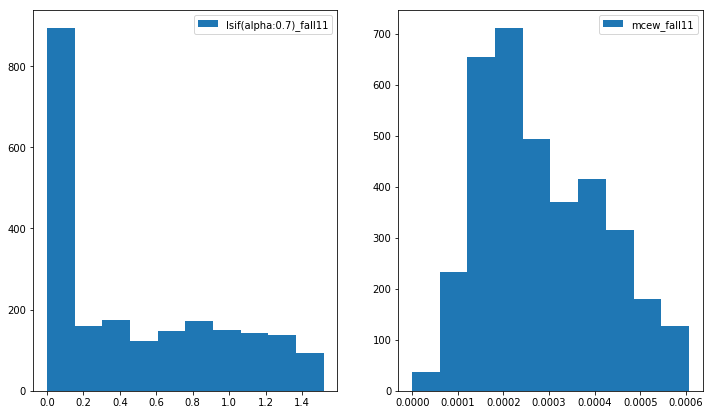

In [287]:
plt.figure(figsize = (12,7))
plt.subplot(1,2,1)
plt.hist(lsif_20_weight[0][5][-len(fall_11):], label = 'lsif(alpha:0.7)_fall11')
plt.legend()
plt.subplot(1,2,2)
plt.hist(weight_list_20[0],  label = 'mcew_fall11')
plt.legend()
plt.savefig('weight_fall11.pdf')

### train error

train error
{'nw': 51.610783, 'lsif': 56.639545, 'mce': 51.402054}


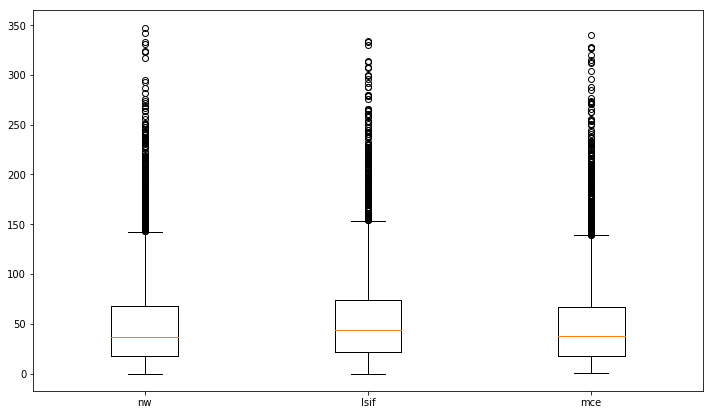

In [252]:
# error
# non-weight
plt.figure(figsize = (12, 7))
train = xgb.DMatrix(spring_11[['temp', 'atemp', 'hum', 'windspeed']], spring_11['cnt'])
nw = np.sqrt((non_weight.predict(train) - train.get_label())**2)
# ru-lsif
test_fall11 = xgb.DMatrix(fall_11[['temp', 'atemp', 'hum', 'windspeed']], fall_11['cnt'])
lsif = np.sqrt((lsif_20[0][5].predict(train) - train.get_label())**2)
# mcew
mce = np.sqrt((mcew_20[0].predict(train) - train.get_label())**2)
plt.boxplot([nw, lsif, mce])
plt.xticks([1,2,3],['nw', 'lsif', 'mce'])
print('train error')
print({'nw':nw.mean(), 'lsif':lsif.mean(), 'mce':mce.mean()})

### test error

test error
{'nw': 119.87656, 'lsif': 119.04467, 'mce': 119.164116}


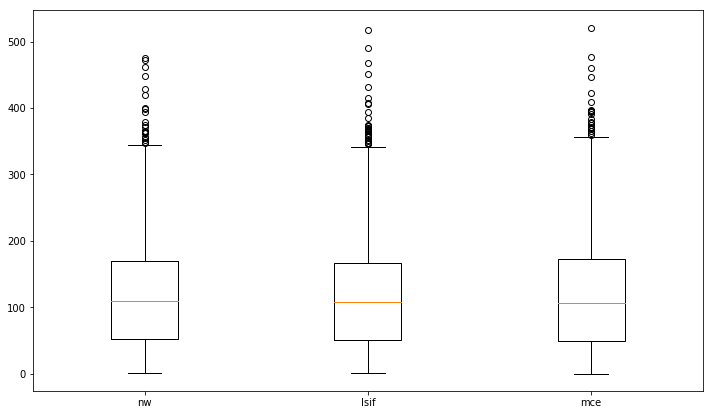

In [265]:
# error
# non-weight
plt.figure(figsize = (12, 7))
nw = np.sqrt((non_weight.predict(dtest1) - dtest1.get_label())**2)
# ru-lsif
test_fall11 = xgb.DMatrix(fall_11[['temp', 'atemp', 'hum', 'windspeed']], fall_11['cnt'])
lsif = np.sqrt((lsif_20[0][5].predict(test_fall11) - test_fall11.get_label())**2)
# mcew
mce = np.sqrt((mcew_20[0].predict(test_fall11) - test_fall11.get_label())**2)
plt.boxplot([nw, lsif, mce])
plt.xticks([1,2,3],['nw', 'lsif', 'mce'])
print('test error')
print({'nw':nw.mean(), 'lsif':lsif.mean(), 'mce':mce.mean()})
plt.savefig('res_fall_11.pdf')

train error
{'nw': 51.610783, 'lsif': 56.639545, 'mce': 51.402054}


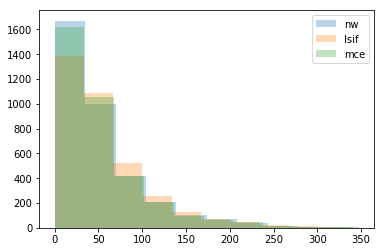

In [233]:
# non-weight
plt.hist(nw, label = 'nw', alpha = 0.3)
# ru-lsif
plt.hist(lsif, label = 'lsif', alpha = 0.3)
# mcew
plt.hist(mce, label ='mce', alpha = 0.3)
plt.legend()
print('train error')
print({'nw':nw.mean(), 'lsif':lsif.mean(), 'mce':mce.mean()})

## spring_12
- $\alpha = 0.7$

### weight distribution

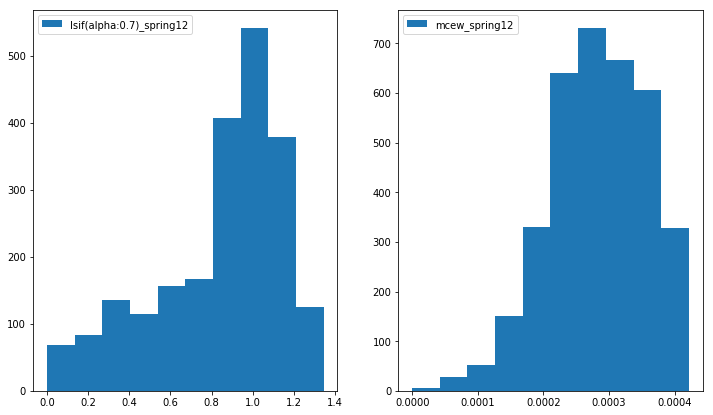

In [288]:
plt.figure(figsize = (12,7))
plt.subplot(1,2,1)
plt.hist(lsif_20_weight[1][5][-len(spring_12):], label = 'lsif(alpha:0.7)_spring12')
plt.legend()
plt.subplot(1,2,2)
plt.hist(weight_list_20[1],  label = 'mcew_spring12')
plt.legend()
plt.savefig('weight_spring12.pdf')

### train error

train error
{'nw': 51.610783, 'lsif': 52.664677, 'mce': 51.798107}


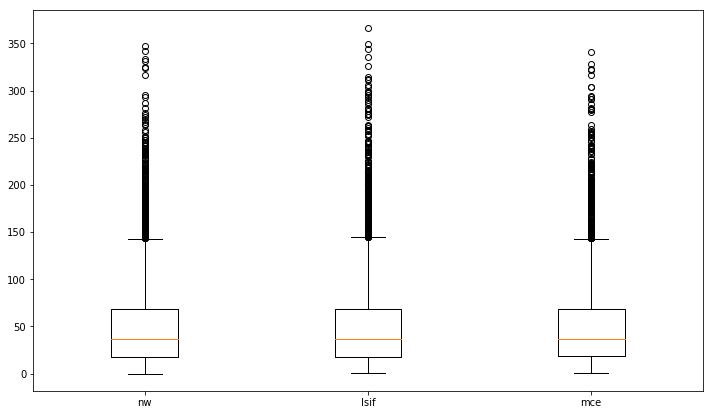

In [259]:
# error
# non-weight
plt.figure(figsize = (12, 7))
train = xgb.DMatrix(spring_11[['temp', 'atemp', 'hum', 'windspeed']], spring_11['cnt'])
nw = np.sqrt((non_weight.predict(train) - train.get_label())**2)
# ru-lsif
lsif = np.sqrt((lsif_20[1][5].predict(train) - train.get_label())**2)
# mcew
mce = np.sqrt((mcew_20[1].predict(train) - train.get_label())**2)
plt.boxplot([nw, lsif, mce])
plt.xticks([1,2,3],['nw', 'lsif', 'mce'])
print('train error')
print({'nw':nw.mean(), 'lsif':lsif.mean(), 'mce':mce.mean()})

### test error

test error
{'nw': 106.72612, 'lsif': 106.52277, 'mce': 106.418594}


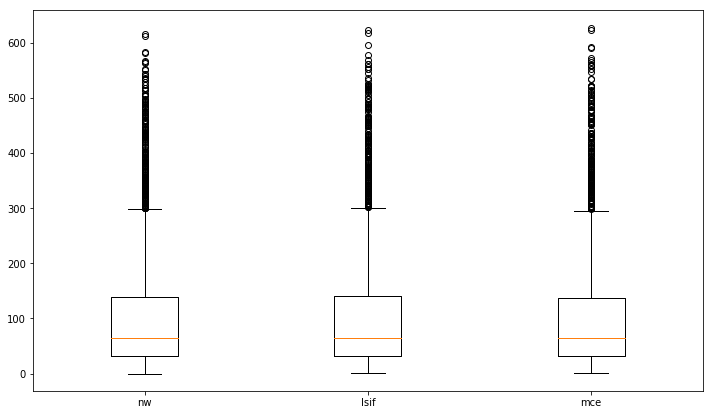

In [269]:
# error
# non-weight
plt.figure(figsize = (12, 7))
nw = np.sqrt((non_weight.predict(dtest2) - dtest2.get_label())**2)
# ru-lsif
test_fall11 = xgb.DMatrix(spring_12[['temp', 'atemp', 'hum', 'windspeed']], spring_12['cnt'])
lsif = np.sqrt((lsif_20[1][5].predict(test_fall11) - test_fall11.get_label())**2)
# mcew
mce = np.sqrt((mcew_20[1].predict(test_fall11) - test_fall11.get_label())**2)
plt.boxplot([nw, lsif, mce])
plt.xticks([1,2,3],['nw', 'lsif', 'mce'])
print('test error')
print({'nw':nw.mean(), 'lsif':lsif.mean(), 'mce':mce.mean()})
plt.savefig('res_spring_12.pdf')

train error
{'nw': 106.72612, 'lsif': 106.52277, 'mce': 106.418594}


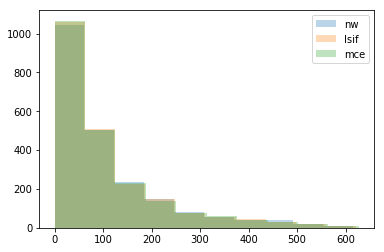

In [240]:
# non-weight
plt.hist(nw, label = 'nw', alpha = 0.3)
# ru-lsif
plt.hist(lsif, label = 'lsif', alpha = 0.3)
# mcew
plt.hist(mce, label ='mce', alpha = 0.3)
plt.legend()
print('train error')
print({'nw':nw.mean(), 'lsif':lsif.mean(), 'mce':mce.mean()})

## fall_12
- $\alpha = 0.4$

### weight distribution

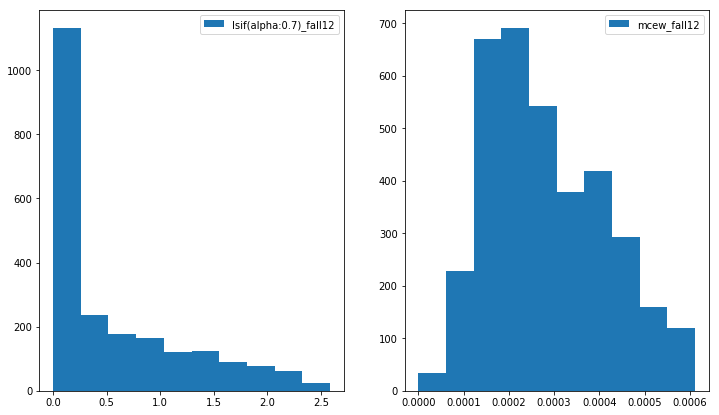

In [289]:
plt.figure(figsize = (12,7))
plt.subplot(1,2,1)
plt.hist(lsif_20_weight[2][2][-len(fall_12):], label = 'lsif(alpha:0.7)_fall12')
plt.legend()
plt.subplot(1,2,2)
plt.hist(weight_list_20[2],  label = 'mcew_fall12')
plt.legend()
plt.savefig('weight_fall12.pdf')

### train error

train error
{'nw': 51.610783, 'lsif': 60.68446, 'mce': 51.169094}


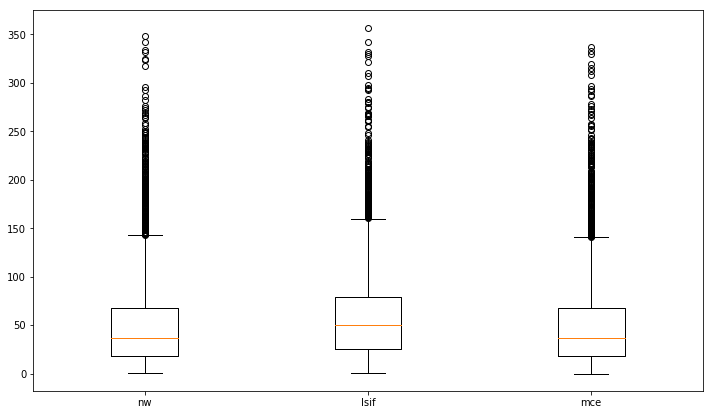

In [261]:
# error
# non-weight
plt.figure(figsize = (12, 7))
train = xgb.DMatrix(spring_11[['temp', 'atemp', 'hum', 'windspeed']], spring_11['cnt'])
nw = np.sqrt((non_weight.predict(train) - train.get_label())**2)
# ru-lsif
lsif = np.sqrt((lsif_20[2][2].predict(train) - train.get_label())**2)
# mcew
mce = np.sqrt((mcew_20[2].predict(train) - train.get_label())**2)
plt.boxplot([nw, lsif, mce])
plt.xticks([1,2,3],['nw', 'lsif', 'mce'])
print('train error')
print({'nw':nw.mean(), 'lsif':lsif.mean(), 'mce':mce.mean()})

In [263]:
fall_12.shape

(2208, 20)

### test error

test error
{'nw': 165.53015, 'lsif': 164.40685, 'mce': 165.27342}


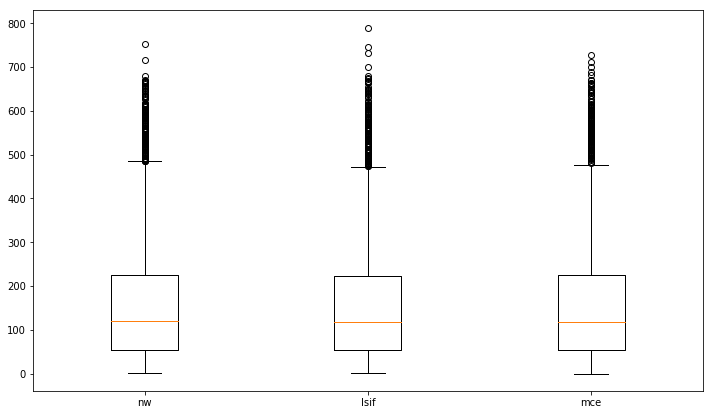

In [270]:
# error
# non-weight
plt.figure(figsize = (12, 7))
nw = np.sqrt((non_weight.predict(dtest3) - dtest3.get_label())**2)
# ru-lsif
test_fall11 = xgb.DMatrix(fall_12[['temp', 'atemp', 'hum', 'windspeed']], fall_12['cnt'])
lsif = np.sqrt((lsif_20[2][2].predict(test_fall11) - test_fall11.get_label())**2)
# mcew
mce = np.sqrt((mcew_20[2].predict(test_fall11) - test_fall11.get_label())**2)
plt.boxplot([nw, lsif, mce])
plt.xticks([1,2,3],['nw', 'lsif', 'mce'])
print('test error')
print({'nw':nw.mean(), 'lsif':lsif.mean(), 'mce':mce.mean()})
plt.savefig('res_fall_12.pdf')

# 特徴量を変更して実行(ダミー変数化)
情報として大切そうなのは、
- weekdayなのか、休日なのか、というフラグ
- 天気を表すフラグ

In [135]:
num_core = 4
dtrain = xgb.DMatrix(
    spring_11[['workingday','weather_2', 'weather_3', 'weather_4','temp', 'atemp', 'hum', 'windspeed']], spring_11['cnt'])
dtest1 = xgb.DMatrix(fall_11[['workingday','weather_2', 'weather_3', 'weather_4','temp', 'atemp', 'hum', 'windspeed']], fall_11['cnt'])
dtest2 = xgb.DMatrix(spring_12[['workingday','weather_2', 'weather_3', 'weather_4','temp', 'atemp', 'hum', 'windspeed']], spring_12['cnt'])
dtest3 = xgb.DMatrix(fall_12[['workingday','weather_2', 'weather_3', 'weather_4','temp', 'atemp', 'hum', 'windspeed']], fall_12['cnt'])

watchlist = [(dtrain, 'train')]
param = {'max_depth': 6, 'eta': 0.2, 'lambda':1,
         'silent': 0, 'nthread': num_core,
         'objective': 'reg:linear', 'booster': 'gbtree'}
num_round = 35
non_weight = xgb.train(param, dtrain, num_round)

In [136]:
print('train error:', np.sqrt((non_weight.predict(dtrain) - dtrain.get_label())**2).mean())
print('test_1 error:', np.sqrt((non_weight.predict(dtest1) - dtest1.get_label())**2).mean())
print('test_2 error:', np.sqrt((non_weight.predict(dtest2) - dtest2.get_label())**2).mean())
print('test_3 error:', np.sqrt((non_weight.predict(dtest3) - dtest3.get_label())**2).mean())

train error: 47.063988
test_1 error: 122.026115
test_2 error: 105.79502
test_3 error: 166.85368


In [223]:
mce.shape

(2208,)

# 実行時間の比較

In [274]:
[spring_11.shape, fall_11.shape]

[(3530, 20), (2192, 20)]

In [277]:
hoge = np.array(spring_11[['temp', 'atemp', 'hum', 'windspeed']]).T
huga = np.array(fall_11[['temp', 'atemp', 'hum', 'windspeed']]).T
hage = np.tile(np.linspace(-6,6, 1000)[:,np.newaxis], 4).T

In [279]:
hoge.shape

(4, 3530)

In [280]:
huga.shape

(4, 2192)

In [281]:
%timeit cal_MCEW(hoge.T, huga.T)

85.6 ms ± 4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
x_de = np.array(spring_11[['temp', 'atemp', 'hum', 'windspeed']]).T
x_nu = np.array(hoge[['temp', 'atemp', 'hum', 'windspeed']]).T
x_re = np.tile(np.linspace(-6,6, 1000)[:,np.newaxis], 4).T

In [283]:
%timeit R_ULSIF(huga, hoge, c_[hage, huga, hoge], alpha,\
                           sigma_list(huga, hoge), lambda_list(), huga.shape[1], 5)

1min ± 546 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [286]:
60.546/25

2.42184